# 911 Calls Capstone Project

In [4]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('911.csv')

In [6]:
df.info

<bound method DataFrame.info of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
5      40.253473 -75.283245   
6      40.182111 -75.127795   
7      40.217286 -75.405182   
8      40.289027 -75.399590   
9      40.102398 -75.291458   
10     40.231990 -75.251891   
11     40.084161 -75.308386   
12     40.174131 -75.098491   
13     40.062974 -75.135914   
14     40.097222 -75.376195   
15     40.223778 -75.235399   
16     40.243258 -75.286552   
17     40.312181 -75.574260   
18     40.114239 -75.338508   
19     40.209337 -75.135266   
20     40.114239 -75.338508   
21     40.117948 -75.209848   
22     40.199006 -75.300058   
23     40.143326 -75.422819   
24     40.153268 -75.189558   
25     40.133037 -75.408463   
26     40.155283 -75.264230   
27     40.028903 -75.351822   
28     40.097222 -75.376195   
29     40.209337 -75.135266   
...    

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

In [9]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
df['title'].nunique()

110

In [21]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])

In [23]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

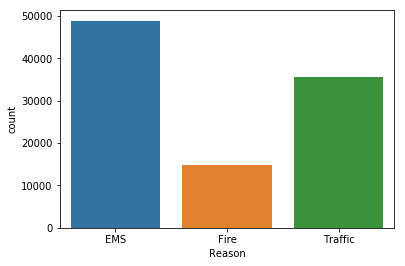

In [24]:
sns.countplot(x='Reason',data=df)

In [26]:
type(df['timeStamp'][0])

str

In [31]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [37]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)

In [41]:
df['Day_of_Week'] = df['timeStamp'].apply(lambda x: x.day)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [42]:
df['Day_of_Week']=df['Day_of_Week'].map(dmap)

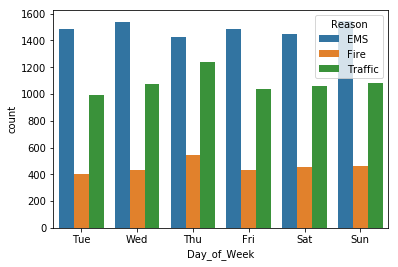

In [43]:
sns.countplot(x='Day_of_Week',data=df,hue='Reason')

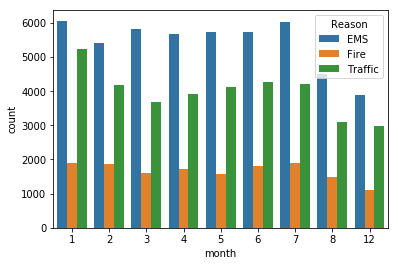

In [45]:
sns.countplot(x='month',data=df,hue='Reason')

In [51]:
bymonth=df.groupby('month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Reason,new,hour,Day_of_Week
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,2206
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,2396
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,2127
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,2562
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,1963


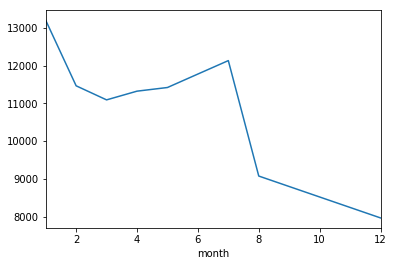

In [53]:
bymonth['twp'].plot()

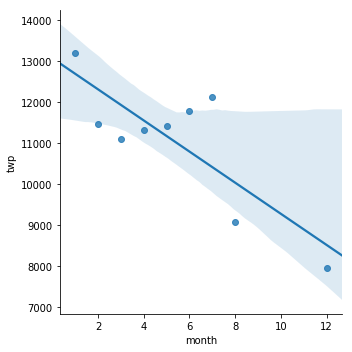

In [56]:
sns.lmplot(x='month',y='twp',data=bymonth.reset_index())

In [64]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

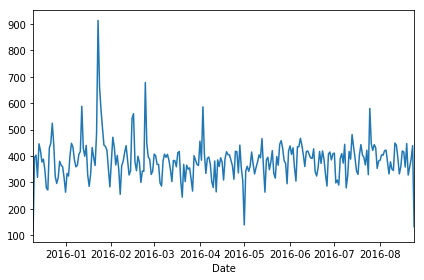

In [62]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

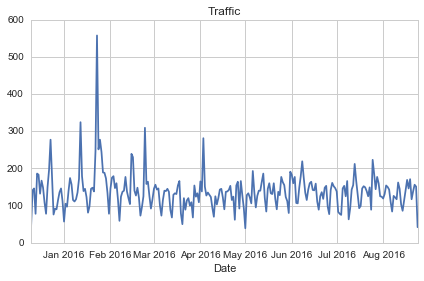

In [199]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

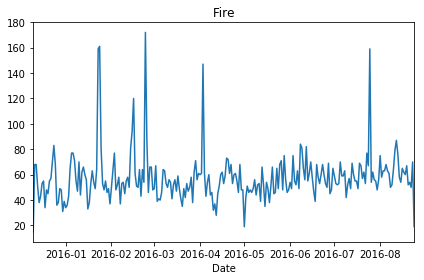

In [65]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

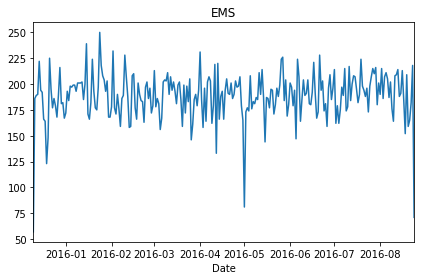

In [66]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [69]:
dayHour = df.groupby(by=['Day_of_Week','hour']).count()['twp'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,72,50,40,42,34,48,75,146,148,149,...,169,157,191,195,152,142,148,116,119,85
Sat,61,52,58,37,41,42,87,132,161,139,...,189,171,196,210,192,133,105,115,92,79
Sun,58,55,38,51,36,49,89,131,138,174,...,207,188,201,224,155,161,126,95,119,98
Thu,62,42,32,55,62,61,107,190,187,225,...,173,205,196,181,166,147,120,109,84,65
Tue,75,41,52,41,43,67,74,133,163,141,...,177,184,180,200,157,125,118,82,70,65


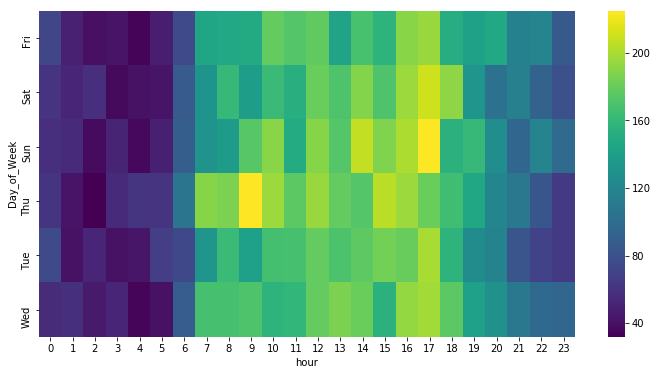

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [75]:
new=df.groupby(by=['Day_of_Week','month']).count()['twp'].unstack()
new.head()

month,1,2,3,4,5,6,7,8
Day_of_Week,,,,,,,,
Fri,402.0,366.0,368.0,408.0,342.0,356.0,290.0,420.0
Sat,448.0,402.0,297.0,334.0,362.0,305.0,391.0,422.0
Sun,433.0,350.0,286.0,391.0,415.0,435.0,409.0,378.0
Thu,324.0,433.0,368.0,586.0,361.0,431.0,309.0,403.0
Tue,263.0,374.0,407.0,456.0,139.0,438.0,411.0,384.0


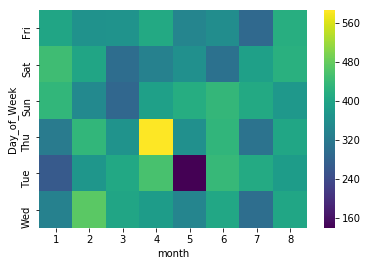

In [76]:
sns.heatmap(new,cmap='viridis')

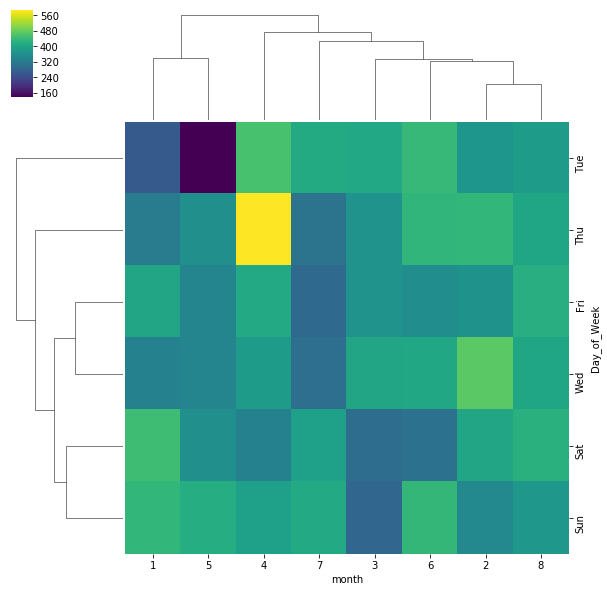

In [78]:
sns.clustermap(new,cmap='viridis')